<a href="https://colab.research.google.com/github/HanifFaishalH/MachineLearning/blob/main/UTS_2341720116_Hanif_Faishal_Hilmi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTS

## Nama     : Hanif Faishal Hilmi

## Kelas     : TI-3F

## NIM     : 2341720116

# Studi Kasus 3 - Heart Diseases

- Studi kasus ini tentang ciri penyakit liver.
- Untuk mahasiswa dengan no absen 3, 6, 9, 12, dst
- Lakukan beberapa tahapan berikut dan lakukan proses analisis terhadap hasil yang dihasilkan.

## Pra Pengolahan Data (10 poin)

1. Load data (0 poin)
2. Cek deskripsi data apakah menggandung nilai yang hilang. Jika ya, sebutkan berapa dan pada fitur yang mana. (5 poin)
4. Drop fitur yang tidak relevan untuk proses clustering. (5 poin)

## Feature Selection (20 poin)

1. Pilih 5 variabel terbaik menurut Anda dari seluruh variabel yang ada. (10 poin)
2. Bagaimana cara Anda memilih 5 variabel tersebut? Kemukakan alasan Anda. (10 poin)

## Clustering - 1 (30 poin)

1. Lakukan pembuatan model cluster dengan menggunakan KMeans dengan jumlah cluster mulai 1 hingga 10. (10 poin)
2. Buat diagram elbow, tentukan jumlah cluster terbaik menurut elbow method dan berikan alasan. (10 poin)
3. Hitung nilai silhouette coefficient dari k=1 hingga k=10. Berdassarkan nilai silhouette, berapa jumlah cluster terbaik? Apakah sama dengan metode elbow? (10 poin)

NB: Anda diperbolehkan untuk melakukan proses normalisasi/standardisasi sebelum pembuatan model clustering. Lakukan pengamatan terhadap hasil clustering.

## Clustering - 2 (20 poin)

1. Lakukan pembuatan model cluster dengan menggunakan DBSCAN. Berapa jumlah cluster yang dihasilkan? (10 poin)
2. Berapa nilai silhouette coefficient dan DBI dari cluster yang dihasilkan oleh DBSCAN? (10 poin)

## Feature Selection 2 (30 poin)
Setelah mengetahui performa hasil clustering pada model KMeans dan DBSCAN berdasakan silhouette coefficient dan DBI, lakukan proses feature selection untuk meningkatkan nilai silhouette coefficient dan DBI. Anda diperbolehkan untuk menggunakan metode iterative process atau metode yang lain.

1. Fitur apa yang memberikan nilai silhouette coefficient/DBI terbaik? Lengkapi dengan proses pemilihan fitur
2. Mengapa Anda menggunakan metode pemilihan fitur tersebut?


## BONUS - CHALLENGE (30 poin)
Buatlah model ANNOY menggunakan data yang telah melalui proses pra pengolahan data. Lakukan query dengan 5 nilai terdekat. Apakah ANNOY melakukan query pada cluster terbaik yang telah Anda bentuk?

# Jawab

## Pra Pengolahan Data (10 poin)

1. Load data (0 poin)
2. Cek deskripsi data apakah menggandung nilai yang hilang. Jika ya, sebutkan berapa dan pada fitur yang mana. (5 poin)
4. Drop fitur yang tidak relevan untuk proses clustering. (5 poin)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Load data
data = pd.read_csv('3_heart.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [2]:
# Cek nilai hilang

data.isnull().sum()

# tidak ada nilai yang kosong

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


## Feature Selection (20 poin)

1. Pilih 5 variabel terbaik menurut Anda dari seluruh variabel yang ada. (10 poin)
2. Bagaimana cara Anda memilih 5 variabel tersebut? Kemukakan alasan Anda. (10 poin)

1. Memilih 5 variabel terbaik

In [3]:
# mencari 5 variabel terbaik

# menghitung matriks korelasi antarkolom numerik dalam dataframe dataset (data)
corr = data.corr(numeric_only=True)

# menentukan kolom 'target' yang ingin dianalisis korelasinya
target_col = 'target'

# mengambil korelasi setiap fitur terhadap target
corr_target = corr[target_col].drop(target_col).sort_values(key=abs, ascending=False)

# Ambil 5 variabel terbaik
top5_features = corr_target.head(5)
print("\n=== 5 VARIABEL TERBAIK BERDASARKAN KORELASI ===")
display(top5_features)


=== 5 VARIABEL TERBAIK BERDASARKAN KORELASI ===


,target
oldpeak,-0.438441
exang,-0.438029
cp,0.434854
thalach,0.422895
ca,-0.382085


2. Cara pemilihan

Caranya menentukan 5 variabel terbaik adalah dengan menghitung korelasi antara setiap variabel numerik dengan variabel target. Kemudian, nilai korelasi diurutkan berdasarkan besar nilai tanpa memperhatikan nilai positif dan negatif. 5 variabel teratas dijadikan sebagai variabel terbaik.

## Clustering - 1 (30 poin)

1. Lakukan pembuatan model cluster dengan menggunakan KMeans dengan jumlah cluster mulai 1 hingga 10. (10 poin)
2. Buat diagram elbow, tentukan jumlah cluster terbaik menurut elbow method dan berikan alasan. (10 poin)
3. Hitung nilai silhouette coefficient dari k=1 hingga k=10. Berdassarkan nilai silhouette, berapa jumlah cluster terbaik? Apakah sama dengan metode elbow? (10 poin)

NB: Anda diperbolehkan untuk melakukan proses normalisasi/standardisasi sebelum pembuatan model clustering. Lakukan pengamatan terhadap hasil clustering.

1. Lakukan pembuatan model cluster dengan menggunakan KMeans dengan jumlah cluster mulai 1 hingga 10. (10 poin)

In [47]:
from sklearn.preprocessing import StandardScaler

# mengambil 5 fitur terbaik
top5_features = ['cp', 'thalach', 'exang', 'oldpeak', 'slope']
X = data[top5_features]

print(X.head())

# normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_data = pd.DataFrame(X_scaled, columns=top5_features)
print("Data setelah standardisasi:")
print(X_scaled_data.head())

   cp  thalach  exang  oldpeak  slope
0   0      168      0      1.0      2
1   0      155      1      3.1      0
2   0      125      1      2.6      0
3   0      161      0      0.0      2
4   0      106      0      1.9      1
Data setelah standardisasi:
         cp   thalach     exang   oldpeak     slope
0 -0.915755  0.821321 -0.712287 -0.060888  0.995433
1 -0.915755  0.255968  1.403928  1.727137 -2.243675
2 -0.915755 -1.048692  1.403928  1.301417 -2.243675
3 -0.915755  0.516900 -0.712287 -0.912329  0.995433
4 -0.915755 -1.874977 -0.712287  0.705408 -0.624121


In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# membuat model cluster dengan jumlah 1-10
sse = []
silhouette_scores = [] # Renamed the list to avoid conflict
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

    if k > 1:
        silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(silhouette_avg) # Append to the renamed list
    else:
        silhouette_scores.append(0) # Append to the renamed list

2. Buat diagram elbow, tentukan jumlah cluster terbaik menurut elbow method dan berikan alasan. (10 poin)

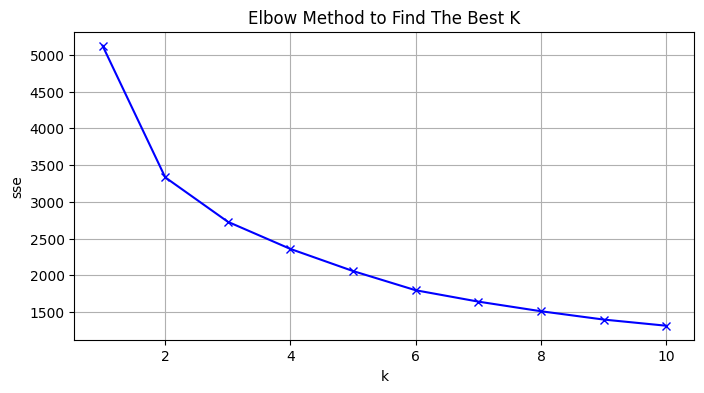

In [50]:
# Visualisasi diagram elbow
plt.figure(figsize=(8,4))
plt.plot(k_range, sse, "bx-")
plt.xlabel("k")
plt.ylabel("sse")
plt.title("Elbow Method to Find The Best K")
plt.grid(True)
plt.show()

Dari visualisasi elbow, nilai k terbaik adalah 5. Karena, di titik ke-5, grafiknya mulai melandai.

3. Hitung nilai silhouette coefficient dari k=1 hingga k=10. Berdassarkan nilai silhouette, berapa jumlah cluster terbaik? Apakah sama dengan metode elbow? (10 poin)

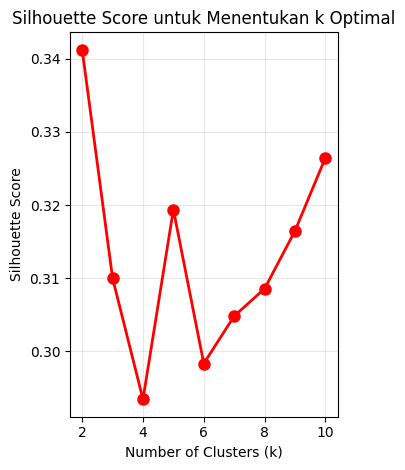

In [52]:
plt.subplot(1, 2, 2)
plt.plot(k_range[1:], silhouette_scores[1:], 'ro-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan k Optimal')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()